Projeto Ciencia de Dados

Parte 1 - Extrair os dados

Para a extração dos dados será necessário importar as bibliotecas do Pandas e o dataset do MyAnimeList

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
Anime_Dataset = "https://raw.githubusercontent.com/guiokushi/MALProj/main/Anime.csv"
df = pd.read_csv(Anime_Dataset)

Parte 2 - Tratamento de dados

Podemos observar que existem muitas informações desnecessárias neste DataFrame então vamos retirar o que não será utilizado e formatar as informações relevantes

In [ ]:
#Removendo colunas não utilizadas
colunas_removidas =['title_english', 'title_japanese', 'title_synonyms','image_url','type','episodes','aired_string','aired','duration','rating','background','premiered','broadcast','related','producer','licensor','opening_theme','ending_theme']
df_final = df.drop(colunas_removidas,axis =1)

#Removendo todas as linhas em branco
df_final.dropna(subset=['rank'], inplace=True)

#Removendo todos os animes sem rank
df_final.drop(df_final[df_final['rank'] == 0].index, inplace=True)

#Removendo todos os animes sem score
df_final.drop(df_final[df_final['score'] == 0].index, inplace=True)

#Removendo todos os animes com o score 10, pois é praticamente impossível ter um anime com score geral 10 pela soma de todas as avaliações de usuários. Até hoje isso não aconteceu...
df_final.drop(df_final[df_final['score'] == 10].index, inplace=True)


#Remover rank acima de 9550
df_final.drop(df_final[df_final['rank'] > 9550].index, inplace=True)


#Remover animes sem favoritos
df_final.drop(df_final[df_final['favorites'] == 0].index, inplace=True)

df_final

,anime_id,title,source,status,airing,score,scored_by,rank,popularity,members,favorites,studio,genre
0,11013,Inu x Boku SS,Manga,Finished Airing,False,7.63,139250,1274.0,231,283882,2809,David Production,"Comedy, Supernatural, Romance, Shounen"
1,2104,Seto no Hanayome,Manga,Finished Airing,False,7.89,91206,727.0,366,204003,2579,Gonzo,"Comedy, Parody, Romance, School, Shounen"
2,5262,Shugo Chara!! Doki,Manga,Finished Airing,False,7.55,37129,1508.0,1173,70127,802,Satelight,"Comedy, Magic, School, Shoujo"
3,721,Princess Tutu,Original,Finished Airing,False,8.21,36501,307.0,916,93312,3344,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy"
4,12365,Bakuman. 3rd Season,Manga,Finished Airing,False,8.67,107767,50.0,426,182765,2082,J.C.Staff,"Comedy, Drama, Romance, Shounen"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13923,33957,Danball Senki Wars: All Star Battle,Original,Finished Airing,False,6.57,91,5318.0,10474,300,1,OLM,"Action, Kids, Mecha, School"
14276,37863,Diamond Fusion,Game,Finished Airing,False,7.27,240,2514.0,9237,622,3,NaN,Music
14297,37090,Hitori no Shita: The Outcast Recap,Manga,Finished Airing,False,6.04,181,7261.0,8378,1013,2,Haoliners Animation League,"Action, Super Power, Supernatural"
14298,36913,Inazuma Eleven x Kaitou Gru no Tsuki Dorobou,Original,Finished Airing,False,5.87,128,7651.0,9441,560,4,OLM,Comedy


# Visualização de dados

Rank dos primeiros 50 animes

In [ ]:
df_final.sort_values('rank').head(50)

,anime_id,title,source,status,airing,score,scored_by,rank,popularity,members,favorites,studio,genre
2555,5114,Fullmetal Alchemist: Brotherhood,Manga,Finished Airing,False,9.25,733592,1.0,4,1199091,106895,Bones,"Action, Military, Adventure, Comedy, Drama, Ma..."
1028,32281,Kimi no Na wa.,Original,Finished Airing,False,9.19,471398,2.0,33,730076,34912,CoMix Wave Films,"Supernatural, Drama, Romance, School"
1252,28977,Gintama°,Manga,Finished Airing,False,9.15,71751,3.0,383,198744,5668,Bandai Namco Pictures,"Action, Comedy, Historical, Parody, Samurai, S..."
6177,30484,Steins;Gate 0,Visual novel,Currently Airing,True,9.15,26739,4.0,323,223989,1882,White Fox,"Sci-Fi, Thriller"
2999,9253,Steins;Gate,Visual novel,Finished Airing,False,9.14,563857,5.0,8,1010330,92423,White Fox,"Thriller, Sci-Fi"
12724,820,Ginga Eiyuu Densetsu,Novel,Finished Airing,False,9.11,29036,6.0,671,124993,8567,"Artland, Magic Bus","Military, Sci-Fi, Space, Drama"
8992,9969,Gintama&#039;,Manga,Finished Airing,False,9.11,92025,7.0,342,215527,4549,Sunrise,"Action, Sci-Fi, Comedy, Historical, Parody, Sa..."
418,11061,Hunter x Hunter (2011),Manga,Finished Airing,False,9.11,403377,8.0,35,720920,64375,Madhouse,"Action, Adventure, Super Power, Shounen"
1307,35180,3-gatsu no Lion 2nd Season,Manga,Finished Airing,False,9.10,30779,9.0,990,85744,2257,Shaft,"Drama, Game, Seinen, Slice of Life"
5783,15417,Gintama&#039;: Enchousen,Manga,Finished Airing,False,9.07,63468,10.0,685,123572,1509,Sunrise,"Action, Comedy, Historical, Parody, Samurai, S..."


Top 3:
1ª FMA *Brotherhood* 
2º Kimi no na wa
3º Gintama

In [ ]:
df_final.sort_values('favorites', ascending=False).head(50)

,anime_id,title,source,status,airing,score,scored_by,rank,popularity,members,favorites,studio,genre
2555,5114,Fullmetal Alchemist: Brotherhood,Manga,Finished Airing,False,9.25,733592,1.0,4,1199091,106895,Bones,"Action, Military, Adventure, Comedy, Drama, Ma..."
2999,9253,Steins;Gate,Visual novel,Finished Airing,False,9.14,563857,5.0,8,1010330,92423,White Fox,"Thriller, Sci-Fi"
7913,1535,Death Note,Manga,Finished Airing,False,8.67,1009477,51.0,1,1456378,88696,Madhouse,"Mystery, Police, Psychological, Supernatural, ..."
34,21,One Piece,Manga,Currently Airing,True,8.54,423868,91.0,35,720133,69760,Toei Animation,"Action, Adventure, Comedy, Super Power, Drama,..."
418,11061,Hunter x Hunter (2011),Manga,Finished Airing,False,9.11,403377,8.0,35,720920,64375,Madhouse,"Action, Adventure, Super Power, Shounen"
8123,16498,Shingeki no Kyojin,Manga,Finished Airing,False,8.49,940211,110.0,2,1345842,64032,Wit Studio,"Action, Military, Mystery, Super Power, Drama,..."
13726,1575,Code Geass: Hangyaku no Lelouch,Original,Finished Airing,False,8.79,627740,30.0,9,986897,63614,Sunrise,"Action, Military, Sci-Fi, Super Power, Drama, ..."
6296,11757,Sword Art Online,Light novel,Finished Airing,False,7.64,915986,1259.0,3,1301616,50042,A-1 Pictures,"Action, Adventure, Fantasy, Game, Romance"
10918,2001,Tengen Toppa Gurren Lagann,Original,Finished Airing,False,8.74,449656,41.0,24,787535,50040,Gainax,"Action, Adventure, Comedy, Mecha, Sci-Fi"
2783,4181,Clannad: After Story,Visual novel,Finished Airing,False,9.01,363239,14.0,55,607387,47380,Kyoto Animation,"Slice of Life, Comedy, Supernatural, Drama, Ro..."


Top 3:
1ª FMA *Brotherhood* 
2º Kimi no na wa
3º Gintama

In [ ]:
df_final.sort_values('popularity').head(50)

,anime_id,title,source,status,airing,score,scored_by,rank,popularity,members,favorites,studio,genre
7913,1535,Death Note,Manga,Finished Airing,False,8.67,1009477,51.0,1,1456378,88696,Madhouse,"Mystery, Police, Psychological, Supernatural, ..."
8123,16498,Shingeki no Kyojin,Manga,Finished Airing,False,8.49,940211,110.0,2,1345842,64032,Wit Studio,"Action, Military, Mystery, Super Power, Drama,..."
6296,11757,Sword Art Online,Light novel,Finished Airing,False,7.64,915986,1259.0,3,1301616,50042,A-1 Pictures,"Action, Adventure, Fantasy, Game, Romance"
2555,5114,Fullmetal Alchemist: Brotherhood,Manga,Finished Airing,False,9.25,733592,1.0,4,1199091,106895,Bones,"Action, Military, Adventure, Comedy, Drama, Ma..."
8863,30276,One Punch Man,Web manga,Finished Airing,False,8.73,691845,44.0,5,1020754,30747,Madhouse,"Action, Sci-Fi, Comedy, Parody, Super Power, S..."
1235,22319,Tokyo Ghoul,Manga,Finished Airing,False,8.00,659308,560.0,6,1013138,28883,Studio Pierrot,"Action, Mystery, Horror, Psychological, Supern..."
13606,6547,Angel Beats!,Original,Finished Airing,False,8.31,641851,227.0,7,1010771,36456,P.A. Works,"Action, Comedy, Drama, School, Supernatural"
2999,9253,Steins;Gate,Visual novel,Finished Airing,False,9.14,563857,5.0,8,1010330,92423,White Fox,"Thriller, Sci-Fi"
13726,1575,Code Geass: Hangyaku no Lelouch,Original,Finished Airing,False,8.79,627740,30.0,9,986897,63614,Sunrise,"Action, Military, Sci-Fi, Super Power, Drama, ..."
4504,20,Naruto,Manga,Finished Airing,False,7.88,648605,745.0,10,980265,34468,Studio Pierrot,"Action, Adventure, Comedy, Super Power, Martia..."


Top 3:
1ª Death Note 
2º Shingeki no Kyoujin
3º Sword Art Online

# Análise com Matplotlib

Vamos criar as variaveis que iremos utilizar usando as colunas de classificação

In [ ]:
rank=df_final['rank']
score=df_final['score']
popularity=df_final['popularity']
favorites=df_final['favorites']

Agora vamos entender como a pontuação e o rank influênciam a popularidade utilizando o gráfico scatterplot

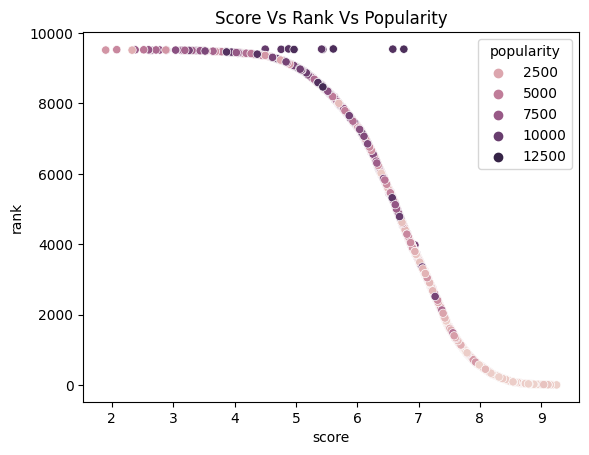

In [ ]:
plt.figure(7)
plt.title("Score Vs Rank Vs Popularity")
sns.scatterplot( x=score, y=rank, hue=popularity);

Podemos observar como a linha formada é um declive que significa que a popularidade não tem uma relação forte com o score ou o rank dos animes

<Axes: title={'center': 'Favourites Vs Rank Vs Popularity'}, xlabel='favorites', ylabel='rank'>

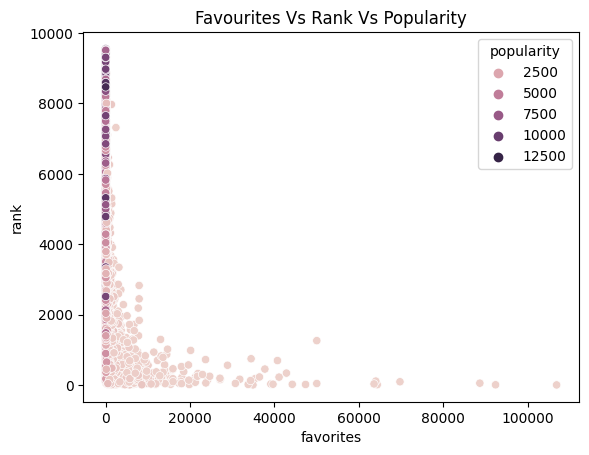

In [ ]:
plt.figure(8)
plt.title("Favourites Vs Rank Vs Popularity")
sns.scatterplot( x=favorites, y=rank, hue =popularity )

Neste gráfico podemos observar a falta de um padrão desenhado pelos dados. Significa que não temos relação entre as variáveis utilizadas 

<Axes: title={'center': 'Score Vs Favorites Vs Popularity'}, xlabel='score', ylabel='favorites'>

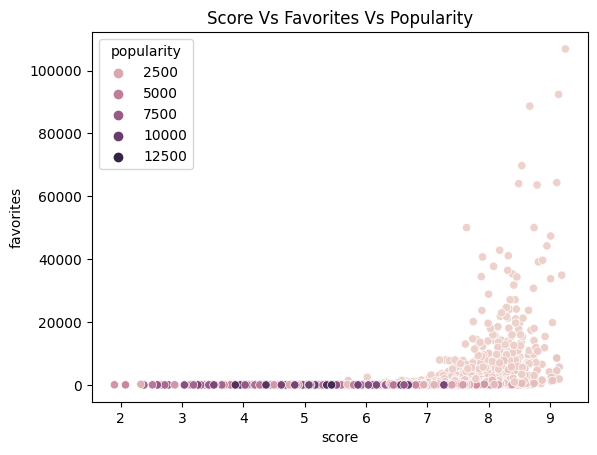

In [ ]:
plt.figure(9)
plt.title("Score Vs Favorites Vs Popularity")
sns.scatterplot( x=score, y=favorites, hue=popularity)

Neste gráfico podemos observar a falta de um padrão desenhado pelos dados. Significa que não temos relação entre as variáveis utilizadas 

#Segunda Analise: Generos de anime

In [ ]:

genreArray = df_final['genre']
genreArray


0          Comedy, Supernatural, Romance, Shounen
1        Comedy, Parody, Romance, School, Shounen
2                   Comedy, Magic, School, Shoujo
3          Comedy, Drama, Magic, Romance, Fantasy
4                 Comedy, Drama, Romance, Shounen
                           ...                   
13923                 Action, Kids, Mecha, School
14276                                       Music
14297           Action, Super Power, Supernatural
14298                                      Comedy
14399                        Music, Slice of Life
Name: genre, Length: 7657, dtype: object

Podemos observar que o genreArray tem seus elementos em conjunto separado por virgulas mas cada conjunto é um elemento único. então precisamos separar cada genero e colocar em outro array;

Não queremos o array de gêneros de cada anime, então precisamos separa-los para que seja possivel contabilizar cada genero

In [ ]:
splitGenres = []

for genres in genreArray:
    if isinstance(genres, str):
        splitGenres.extend(genres.split(", "))

print(splitGenres)


['Comedy', 'Supernatural', 'Romance', 'Shounen', 'Comedy', 'Parody', 'Romance', 'School', 'Shounen', 'Comedy', 'Magic', 'School', 'Shoujo', 'Comedy', 'Drama', 'Magic', 'Romance', 'Fantasy', 'Comedy', 'Drama', 'Romance', 'Shounen', 'Kids', 'School', 'Shoujo', 'Magic', 'Comedy', 'Romance', 'School', 'Shoujo', 'Action', 'Drama', 'Fantasy', 'Romance', 'School', 'Supernatural', 'Music', 'Slice of Life', 'Comedy', 'Romance', 'Josei', 'Comedy', 'Harem', 'Romance', 'School', 'Shoujo', 'Comedy', 'Drama', 'Romance', 'Shounen Ai', 'Comedy', 'Romance', 'School', 'Shoujo', 'Comedy', 'Drama', 'Romance', 'Shounen Ai', 'Slice of Life', 'Comedy', 'Romance', 'School', 'Shoujo', 'Action', 'Adventure', 'Comedy', 'Super Power', 'Supernatural', 'Shounen', 'Sci-Fi', 'Comedy', 'Drama', 'Romance', 'Ecchi', 'Seinen', 'Slice of Life', 'Drama', 'Romance', 'School', 'Shoujo', 'Action', 'Adventure', 'Comedy', 'Super Power', 'Martial Arts', 'Shounen', 'Slice of Life', 'Comedy', 'Martial Arts', 'Fantasy', 'Slice of L

Agora precisamos pegar apenas a instância única de cada genero para podermos analisar os dados referentes a eles

In [ ]:
from collections import Counter

genre_counts = Counter(splitGenres)

print(genre_counts)

Counter({'Comedy': 3390, 'Action': 2472, 'Adventure': 1769, 'Sci-Fi': 1706, 'Fantasy': 1705, 'Drama': 1579, 'Shounen': 1458, 'Romance': 1361, 'School': 1096, 'Slice of Life': 950, 'Supernatural': 944, 'Mecha': 749, 'Magic': 711, 'Ecchi': 602, 'Seinen': 533, 'Shoujo': 517, 'Historical': 497, 'Mystery': 497, 'Music': 485, 'Kids': 433, 'Super Power': 414, 'Sports': 406, 'Military': 399, 'Space': 318, 'Harem': 298, 'Parody': 293, 'Horror': 289, 'Demons': 246, 'Psychological': 239, 'Martial Arts': 225, 'Game': 198, 'Police': 171, 'Samurai': 117, 'Vampire': 108, 'Dementia': 107, 'Thriller': 83, 'Josei': 72, 'Shounen Ai': 70, 'Shoujo Ai': 60, 'Cars': 50})


Qual é o gênero mais presente e menos presente?

In [ ]:
print("Mais presente é:", max(genre_counts, key=genre_counts.get), "|com a contagem de:", genre_counts[max(genre_counts, key=genre_counts.get)])
print("Menos presente é:", min(genre_counts, key=genre_counts.get), "|com a contagem de:", genre_counts[min(genre_counts, key=genre_counts.get)])

Mais presente é: Comedy |com a contagem de: 3390
Menos presente é: Cars |com a contagem de: 50


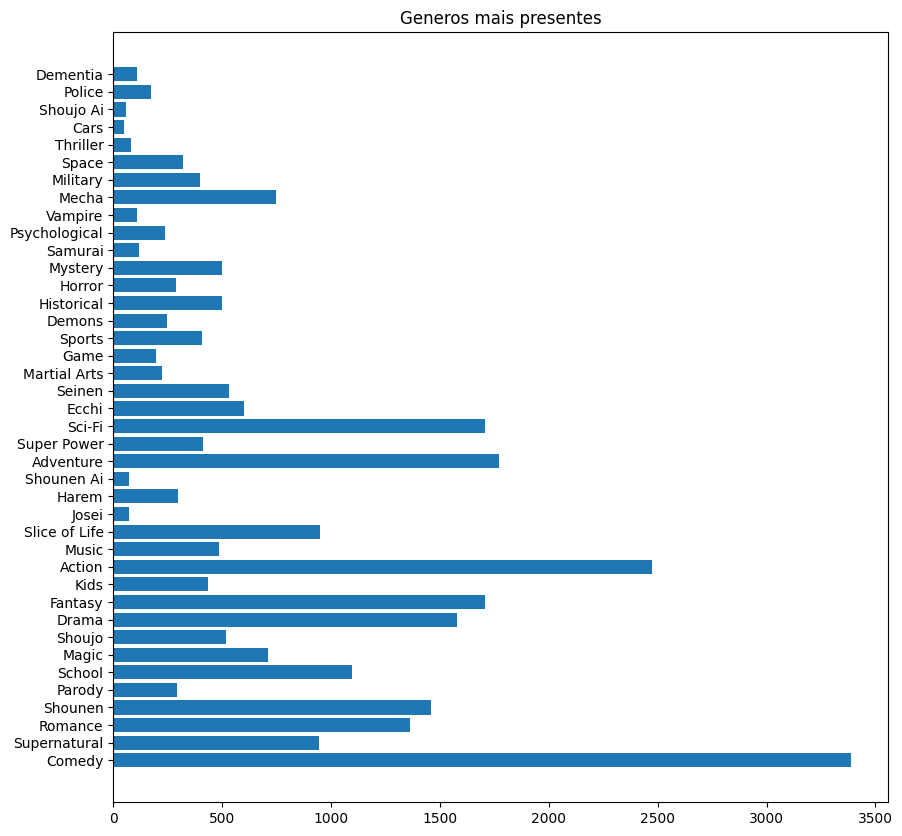

In [ ]:
# Categorias mais presentes no DB
names = list(genre_counts.keys())
values = list(genre_counts.values())
space_bar = 0.2

fig, ax = plt.subplots(figsize=(10,10))

ax.set_title('Generos mais presentes')
ax.barh(names,values)
ax.set_yticks(ax.get_yticks())

plt.show()

Vamos analisar os generos mais presentes no Top 10

In [ ]:
df_final.sort_values('rank', ascending=True).head(10)

,anime_id,title,source,status,airing,score,scored_by,rank,popularity,members,favorites,studio,genre
2555,5114,Fullmetal Alchemist: Brotherhood,Manga,Finished Airing,False,9.25,733592,1.0,4,1199091,106895,Bones,"Action, Military, Adventure, Comedy, Drama, Ma..."
1028,32281,Kimi no Na wa.,Original,Finished Airing,False,9.19,471398,2.0,33,730076,34912,CoMix Wave Films,"Supernatural, Drama, Romance, School"
1252,28977,Gintama°,Manga,Finished Airing,False,9.15,71751,3.0,383,198744,5668,Bandai Namco Pictures,"Action, Comedy, Historical, Parody, Samurai, S..."
6177,30484,Steins;Gate 0,Visual novel,Currently Airing,True,9.15,26739,4.0,323,223989,1882,White Fox,"Sci-Fi, Thriller"
2999,9253,Steins;Gate,Visual novel,Finished Airing,False,9.14,563857,5.0,8,1010330,92423,White Fox,"Thriller, Sci-Fi"
12724,820,Ginga Eiyuu Densetsu,Novel,Finished Airing,False,9.11,29036,6.0,671,124993,8567,"Artland, Magic Bus","Military, Sci-Fi, Space, Drama"
8992,9969,Gintama&#039;,Manga,Finished Airing,False,9.11,92025,7.0,342,215527,4549,Sunrise,"Action, Sci-Fi, Comedy, Historical, Parody, Sa..."
418,11061,Hunter x Hunter (2011),Manga,Finished Airing,False,9.11,403377,8.0,35,720920,64375,Madhouse,"Action, Adventure, Super Power, Shounen"
1307,35180,3-gatsu no Lion 2nd Season,Manga,Finished Airing,False,9.10,30779,9.0,990,85744,2257,Shaft,"Drama, Game, Seinen, Slice of Life"
5783,15417,Gintama&#039;: Enchousen,Manga,Finished Airing,False,9.07,63468,10.0,685,123572,1509,Sunrise,"Action, Comedy, Historical, Parody, Samurai, S..."


# Análises levando em conta o top 20

Vamos entender por que os seguintes animes estão no Top 20 do MAL

In [ ]:
df_teste = df_final
df_teste.drop(df_teste[df_teste['rank'] > 20].index, inplace=True)
df_teste_f=df_teste.sort_values('rank', ascending=True)

# Possível tendência do mercado 

In [ ]:

df_teste_f=df_teste.sort_values('airing', ascending=False)
df_teste_f

,anime_id,title,source,status,airing,score,scored_by,rank,popularity,members,favorites,studio,genre
6177,30484,Steins;Gate 0,Visual novel,Currently Airing,True,9.15,26739,4.0,323,223989,1882,White Fox,"Sci-Fi, Thriller"
418,11061,Hunter x Hunter (2011),Manga,Finished Airing,False,9.11,403377,8.0,35,720920,64375,Madhouse,"Action, Adventure, Super Power, Shounen"
6553,918,Gintama,Manga,Finished Airing,False,9.01,141830,15.0,95,459031,33781,Sunrise,"Action, Sci-Fi, Comedy, Historical, Parody, Sa..."
12724,820,Ginga Eiyuu Densetsu,Novel,Finished Airing,False,9.11,29036,6.0,671,124993,8567,"Artland, Magic Bus","Military, Sci-Fi, Space, Drama"
10879,34096,Gintama.,Manga,Finished Airing,False,9.02,40441,13.0,934,91695,1237,Bandai Namco Pictures,"Action, Comedy, Historical, Parody, Samurai, S..."
8992,9969,Gintama&#039;,Manga,Finished Airing,False,9.11,92025,7.0,342,215527,4549,Sunrise,"Action, Sci-Fi, Comedy, Historical, Parody, Sa..."
7403,2904,Code Geass: Hangyaku no Lelouch R2,Original,Finished Airing,False,8.95,543904,18.0,22,791396,44230,Sunrise,"Action, Military, Sci-Fi, Super Power, Drama, ..."
7105,199,Sen to Chihiro no Kamikakushi,Original,Finished Airing,False,8.92,498602,19.0,39,705769,15412,Studio Ghibli,"Adventure, Supernatural, Drama"
6615,35247,Owarimonogatari 2nd Season,Light novel,Finished Airing,False,9.02,42842,13.0,762,113928,2432,Shaft,"Comedy, Mystery, Supernatural, Vampire"
6572,28851,Koe no Katachi,Manga,Finished Airing,False,9.04,296261,12.0,77,511915,19815,Kyoto Animation,"Drama, School, Shounen"


Apenas uma breve visualização sobre quantas obras do top 20 estão no ar (televisionadas atualmente). No caso, apenas uma obra atende esta característica, Steins Gate 0 (Rank 4).
Tal dado pode indicar um declínio na qualidade atual das obras, pela ótica dos consumidores.

# Fontes de obras presentes no top 20

<Axes: title={'center': 'Source vs Rank'}, xlabel='rank', ylabel='source'>

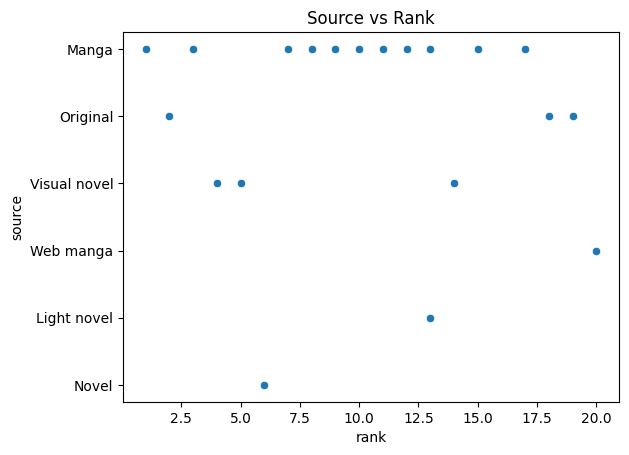

In [ ]:
plt.figure(9)
plt.title("Source vs Rank")
sns.scatterplot(data=df_teste_f, y='source', x=rank)



Verifica-se que Manga(presença predominante), Original e Visual Novel são os tipos de "source"(origem) da obra que atingem os melhores ranks. 
Uma das justificativas para tal é a maior presença de obras com essas classificações sendo lançadas do que as outras categorias, o que favorece, estatisticamente, para o resultado. Lembrando que esta é apenas uma variável para tal, já que ótimas obras de outras fontes estão aparecendo com mais frequência no mercado.

# Estúdios Top 20

In [ ]:
#Array separando apenas os estúdios
studioArray = df_teste_f['studio']
print(studioArray)

#Simples split dos estúdios
splitStudio = []

for studio in studioArray:
    if isinstance(studio, str):
        splitStudio.extend(studio.split(", "))

print(splitStudio)

In [ ]:
#Contagem dos estúdios que aparecem no Top 20
studio_counts = Counter(splitStudio)
print(studio_counts)

Counter({'Sunrise': 5, 'White Fox': 2, 'Bandai Namco Pictures': 2, 'Shaft': 2, 'Kyoto Animation': 2, 'Madhouse': 1, 'Artland': 1, 'Magic Bus': 1, 'Studio Ghibli': 1, 'Production I.G': 1, 'CoMix Wave Films': 1, 'Kinema Citrus': 1, 'Bones': 1})


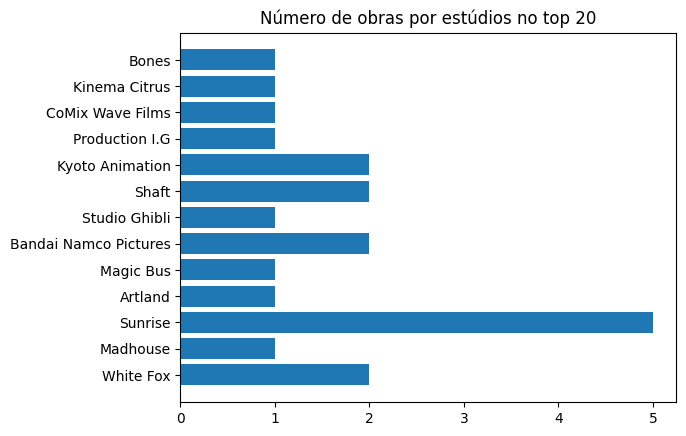

In [ ]:
#Quantas obras para cada estúdio, presentes no top 20

names = list(studio_counts.keys())
values = list(studio_counts.values())

fig, ax = plt.subplots()
ax.set_title('Número de obras por estúdios no top 20')
ax.barh(range(len(studio_counts)),values)
ax.set_yticks(range(len(studio_counts)),labels=names)

plt.show()

Rank dos estúdios presentes no top 20 da relação. Separando apenas os que apresentam maior número de obras no top, tem-se:

Top 5 estúdios:
Sunrise(5), Kyoto Animation(2), Shaft(2), Bandai Namco Pictures(2), White Fox(2)



<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


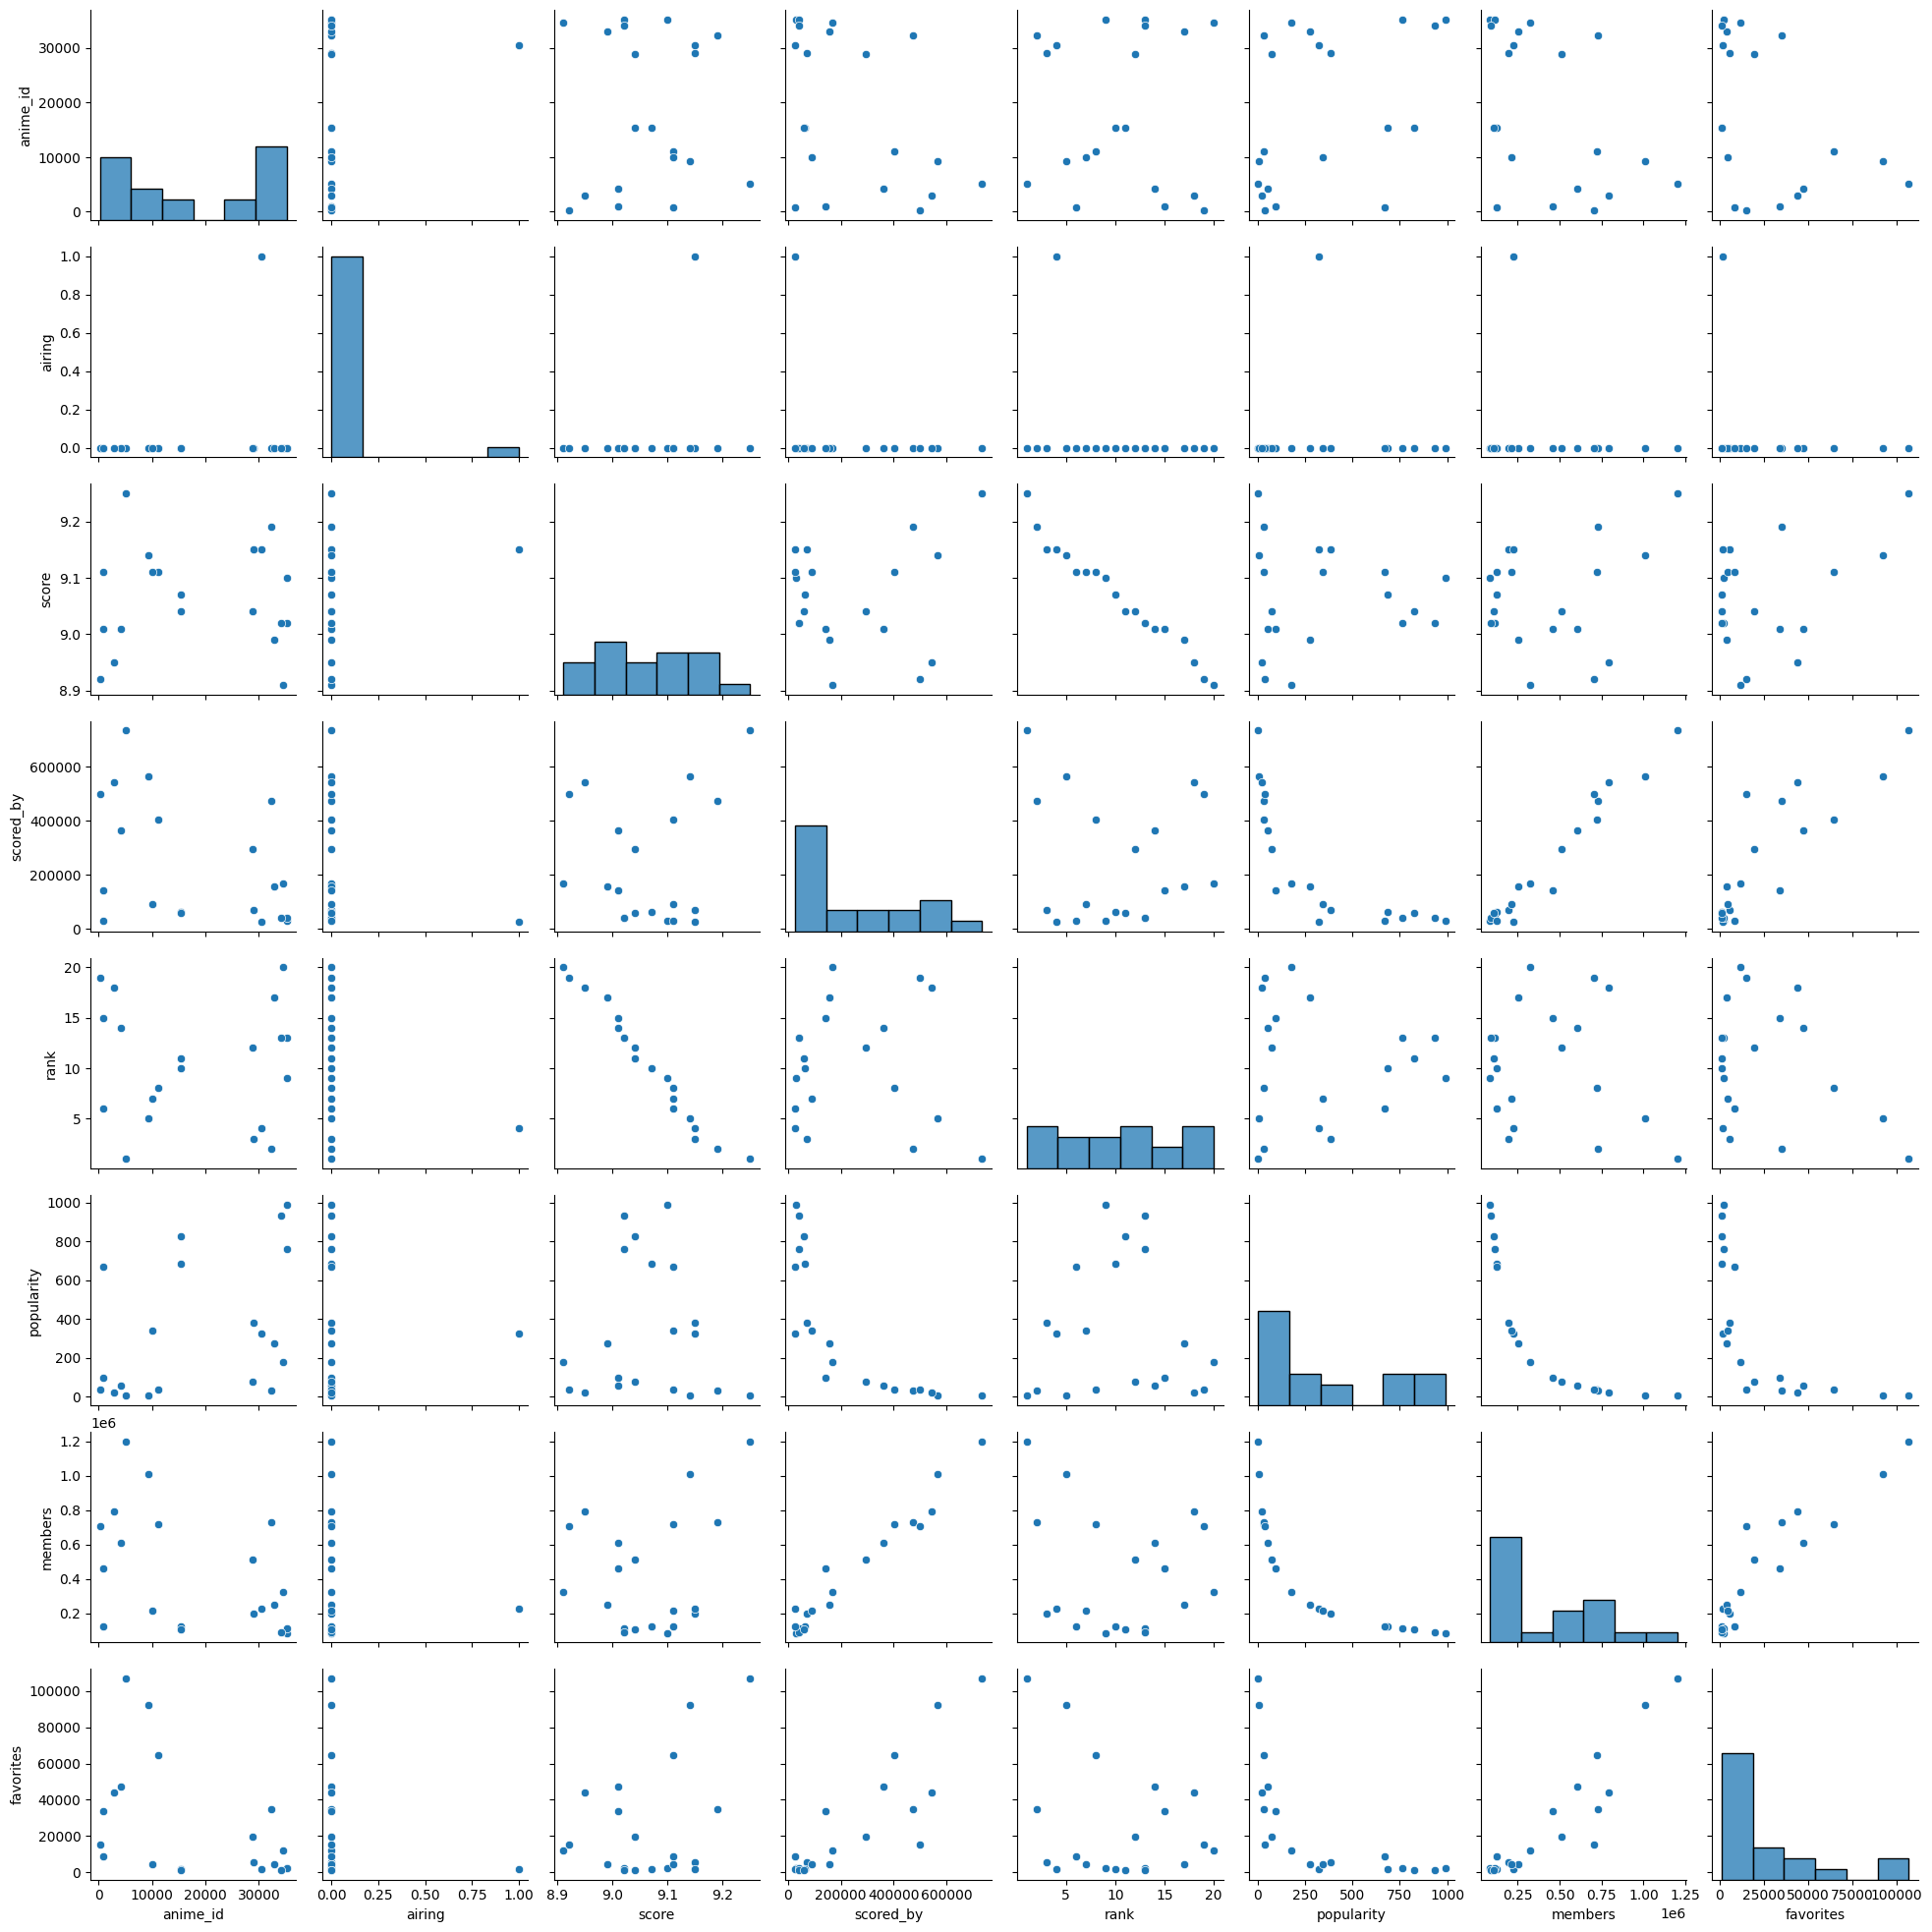

In [ ]:
sns.pairplot(df_final)

In [ ]:
### Regressão Simples
# Isolando as variáveis

X = df['rank'].values
Y = df['score'].values
genre_unique = df['genre'].unique()
print(X)
print(Y)


[ 1274.   727.  1508. ...    nan 11557. 12056.]
[7.63 7.89 7.55 ... 0.   6.   5.15]


In [ ]:
# Executando a regressão:
import statsmodels.formula.api as sm
regression = LinearRegression()

# Regressão Multipla
lm = sm.ols(formula='rank ~ score + genre', data=df_final)
result = lm.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   rank   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     56.96
Date:                Sun, 04 Jun 2023   Prob (F-statistic):            0.00330
Time:                        15:35:53   Log-Likelihood:                -5.8492
No. Observations:                  20   AIC:                             45.70
Df Residuals:                       3   BIC:                             62.63
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [ ]:
#Verificando se existem dados faltantes
# Caso o array esteja vazio, não há dados faltantes no modelo.

mv = Y == np.NAN #Variável Y
Y[mv == True]

mv = X == np.NAN #Variável X
X[mv == True]

array([], dtype=float64)

No caso, confirma-se a hipótese de não haver dados faltantes para o modelamento

In [ ]:
#Predição do Rank
score_test = 9.2
rank_test =  710.9591 +  -77.1635 * score_test 
print(f'Para score 9.2 = {rank_test:.4f}')

Para score 9.2 = 1.0549


O DB utilizado é de 2018, sendo assim o maior score apresentado é 9.2.
Já, verificando um DB mais atual, observa-se que o maior score encontrado é 9.19. Sendo assim, o modelo está de acordo com as predições, mostrando que um score 9.2, seria de fato o Rank #1

# Conclusão

O projeto tinha como objetivo analisar os dados presentes no DB, suas relações, verificar a qualidade e veracidade dos mesmos e desenvolver uma análise direta através das explorações. Conforme o trabalho foi se desenvolvendo, observou-se diversas inconsistências nos dados, erros humanos no preenchimento do DB, relevando o fato do database ser de 2018, portanto apresenta dados desatualizados.

Diante da situação descrita acima, foram necessárias algumas limpezas de dados e enriquecimento durante o processo de análise, como retirada do Rank 0, já que não existe numa avaliação do tipo, limpeza dos scores, pois números como 0 e 10 não são factíveis e causariam apenas desvios na avaliação como um todo. Após os tratamentos necessários, a fase de análise e predição poderiam começar.

Primeiramente, foram analisadas as relações 'Score Vs Rank Vs Popularity', 'Favorities Vs Rank Vs Popularity' entre outras. Assim concluimos uma direta relação entre Score e Rank, porém a Popularidade não se provou tão relevante para os dados, algo não esperado durante o início do projeto. A partir desse instante o foco voltou-se para uma possível predição do Rank de uma obra, baseando-se no score atribuido a ela, iniciando a fase de regressão linear.

O modelo desenvolvido, após diversos testes, foi baseado nas variáveis Score e Genre, enriquecendo ainda mais o modelamento, com os dados: R-squared = 0.997, Coef.Intercept = 710.9591 e Coef.score = -77.1635.
Através deste modelo pode-se predizer, com uma precisão relevante, o rank.

Portanto, a análise mostrou-se incerta, antes das limpezas e do enriquecimento, porém tornou-se precisa e condizente com os dados atuais, entregando uma predição bem estipulada e rente aos dados presentes, como justificado no trecho:

 "O DB utilizado é de 2018, sendo assim o maior score apresentado é 9.2. Já, verificando um DB mais atual, observa-se que o maior score encontrado é 9.19. Sendo assim, o modelo está de acordo com as predições, mostrando que um score 9.2, seria de fato o Rank #1"

